<a href="https://colab.research.google.com/github/Vysakhks1807/New-folder--2-/blob/main/prodigy_infotech_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("train.csv")  # Use the correct path if downloading from Kaggle


# New Section

In [4]:
print(df.info())  # Check column types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # View the first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill age with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill with most common port
df.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' due to too many missing values


<ipython-input-6-c8539311a7f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill age with median
<ipython-input-6-c8539311a7f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode gender
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encode Embarked


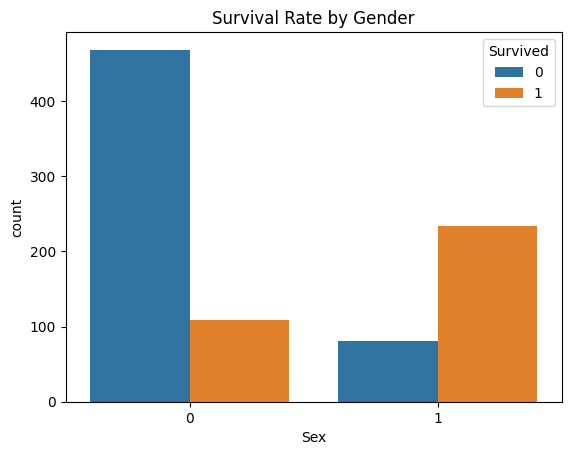

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()


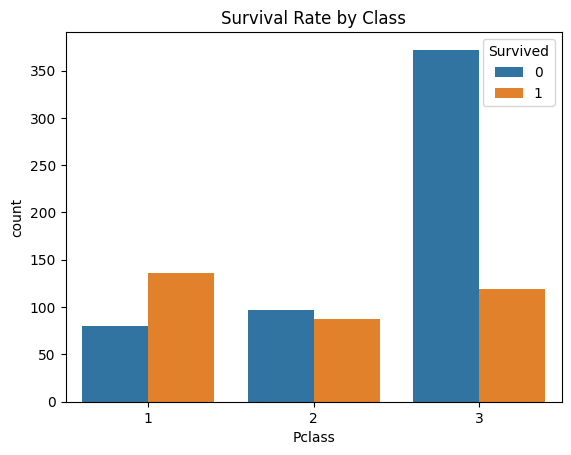

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Rate by Class")
plt.show()


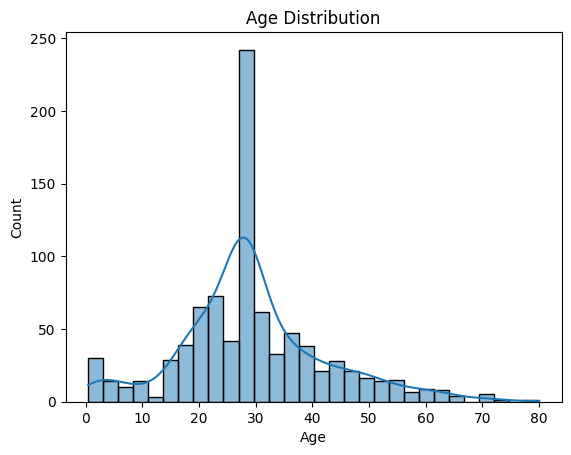

In [10]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


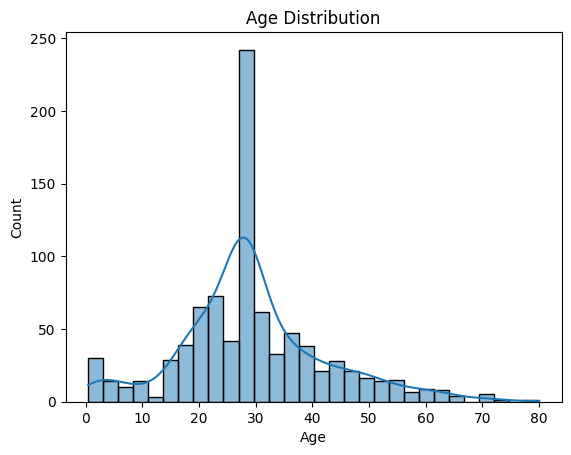

In [11]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


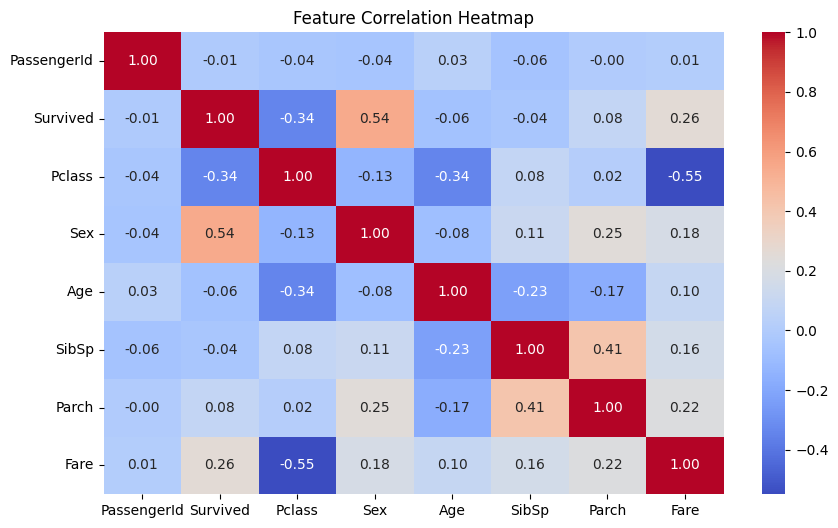

In [13]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

